In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read CSV
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [4]:
#Cheaking shape()
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#Cheaking Douplicated
df.duplicated().sum()

0

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
#Cheaking  null values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
#Cheaking null values in percentage
null_percentage=(df.isna().sum()/len(df))*100
null_percentage

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Deleting redundant columns.

In [10]:
df.drop(['url','address','dish_liked','reviews_list','menu_item','listed_in(city)'],axis=1,inplace=True)
df.head(1)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet


In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'phone',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Renaming the columns.

In [12]:
df.rename(columns={'name':'Restourant Name','online_order':'Online Order','book_table':'Book Table','rate':'Rating','votes':'Votes','phone':'Phone','location':'Locations','rest_type':'Rest Type','cuisines':'Cuisines','approx_cost(for two people)':'Approx cost for two people','listed_in(type)':'Type'},inplace=True)
df.head()

,Restourant Name,Online Order,Book Table,Rating,Votes,Phone,Locations,Rest Type,Cuisines,Approx cost for two people,Type
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Dropping duplicates.

In [13]:
df.duplicated().sum()

14572

In [14]:
df=df.drop_duplicates()

# Cleaning individual columns.

In [15]:
#Restourant Name
df['Restourant Name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [16]:
#Online Order
df['Online Order'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
#Book Table
df['Book Table'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
#Rating
df['Rating'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
df['Rating'].replace('-','0.0/5',inplace=True)
df['Rating'].replace('NEW','0.0/5',inplace=True)
df['Rating']=df['Rating'].str.replace('/5','')

In [20]:
df['Rating']=df['Rating'].astype('float64')

In [21]:
df['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: Rating, Length: 37145, dtype: float64

# Remove the NaN values from the dataset

In [22]:
df=df.dropna()

In [23]:
df.isna().sum()

Restourant Name               0
Online Order                  0
Book Table                    0
Rating                        0
Votes                         0
Phone                         0
Locations                     0
Rest Type                     0
Cuisines                      0
Approx cost for two people    0
Type                          0
dtype: int64

In [24]:
#Votes
df['Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [25]:
#Phone
df['Phone']

0          080 42297555\r\n+91 9743772233
1                            080 41714161
2                          +91 9663487993
3                          +91 9620009302
4        +91 8026612447\r\n+91 9901210005
                       ...               
51709      +91 9980121279\n+91 9900240646
51711                        080 65951222
51712                        080 40301477
51715                        080 49652769
51716                      +91 8071117272
Name: Phone, Length: 32336, dtype: object

In [26]:
df['Phone']=df['Phone'].str.replace('\r','')
df['Phone']=df['Phone'].str.replace('\n','')

In [27]:
df['Phone']

0          080 42297555+91 9743772233
1                        080 41714161
2                      +91 9663487993
3                      +91 9620009302
4        +91 8026612447+91 9901210005
                     ...             
51709    +91 9980121279+91 9900240646
51711                    080 65951222
51712                    080 40301477
51715                    080 49652769
51716                  +91 8071117272
Name: Phone, Length: 32336, dtype: object

In [28]:
#Locations
df['Locations'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [29]:
#Rest Type
df['Rest Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [30]:
#Cuisines
df['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [31]:
#Approx cost for two people
df['Approx cost for two people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [32]:
df['Approx cost for two people']=df['Approx cost for two people'].str.replace(',','')

In [33]:
df['Approx cost for two people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [34]:
#Type
df['Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [35]:
df.head(2)

,Restourant Name,Online Order,Book Table,Rating,Votes,Phone,Locations,Rest Type,Cuisines,Approx cost for two people,Type
0,Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


# Data Visulization

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Restaurants delivering Online or not

<Axes: xlabel='Online Order', ylabel='count'>

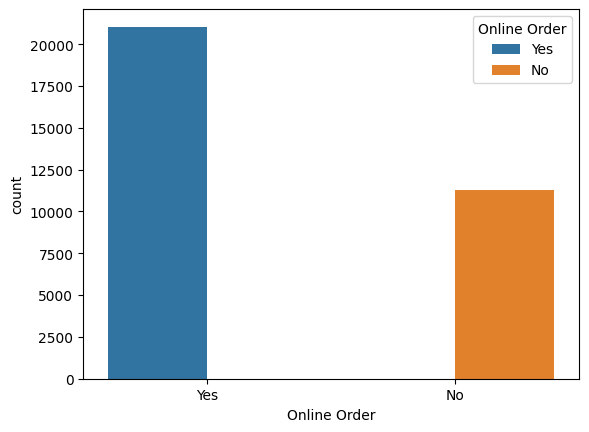

In [37]:
sns.countplot(x='Online Order',data=df,hue='Online Order')

* Here we plotted countplot for checking whether the restaurants are delivering online or not.
*we concluded that 20000 restaurant are delivering online foods and near about 11000 are not delivering online foods
*So by observations we concluded that most of the restaurant are delivering online foods.

# Restaurants allowing table booking or not

<Axes: xlabel='Book Table', ylabel='count'>

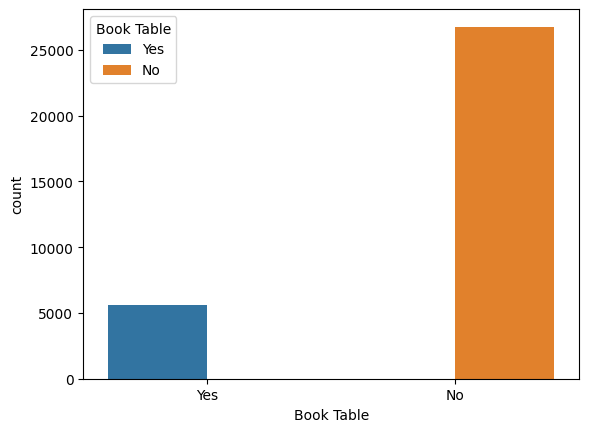

In [38]:
sns.countplot(x='Book Table',data=df,hue='Book Table')

* Here we plotted countplot for checking whether restaurant are allowing table booking or not.
*We concluded that 5000 restaurant are allowing for table booking and 25000 are not allowing for booking.
*So by observations we concluded that most of the restaurant are not allowing table booking.

# Table booking Rate vs Rate

<Axes: xlabel='Book Table', ylabel='Rating'>

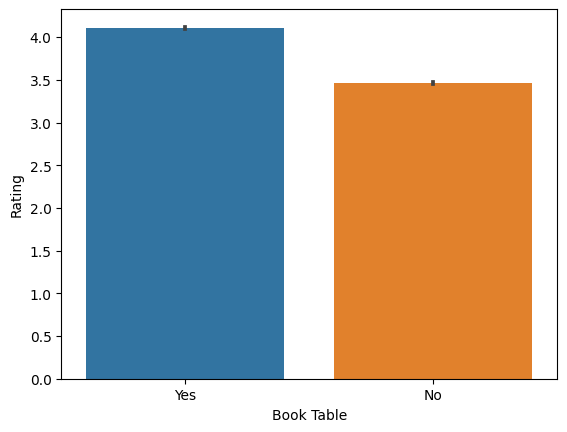

In [39]:
sns.barplot(x='Book Table',y='Rating',data=df)

* Here we plotted barplot for checking rating according to table booking.
*We concluded that about 4.0 rating restaurants were accepting table booking and near about 3.4 rating restaurants were not accepting table booking.
*So by observation we concluded that restaurants with highest rating were accepting booking.

# Best Location

<Axes: title={'center': 'Best Location (Rating)'}, xlabel='Rating', ylabel='Locations'>

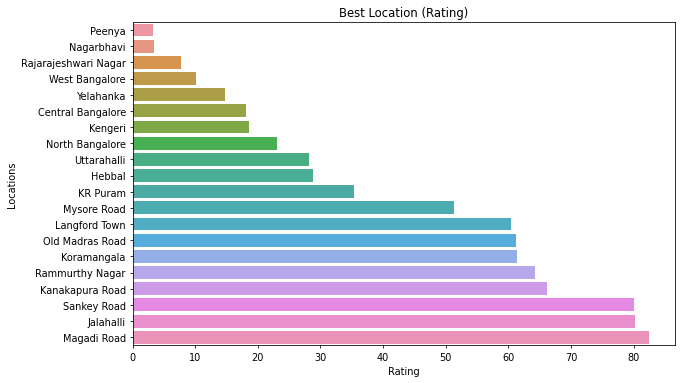

In [40]:
plt.figure(figsize=(10,6),dpi=70)
plt.title('Best Location (Rating)')
s=df.groupby('Locations')[['Rating']].sum().sort_values(by='Rating',ascending=True).head(20)
sns.barplot(s,y=s.index,x='Rating')

* Here we plotted barplot for checking best location according to the rating.
*This graphs shows that which location has the most number of restaurant and which has the lowest number of restaurant.
*We concluded that BTM is the location with highest number of restaurant.

<Axes: title={'center': 'Best Location (Votes)'}, xlabel='Votes', ylabel='Locations'>

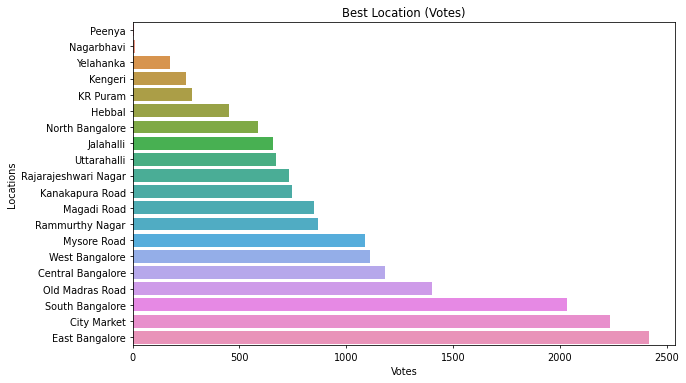

In [41]:
plt.figure(figsize=(10,6),dpi=70)
plt.title('Best Location (Votes)')
s=df.groupby('Locations')[['Votes']].sum().sort_values(by='Votes',ascending=True).head(20)
sns.barplot(s,y=s.index,x='Votes')

* Here we plotted barplot for checking best location according to the votes.
*This graphs shows that which location has the most number of restaurant and which has the lowest number of restaurant.
*We concluded that Koramangala 5th Block is the location with highest number of restaurant according to the votes.

# Relation between Location and Rating

<Axes: title={'center': 'Relation between Location and Rating'}, xlabel='Rating', ylabel='Locations'>

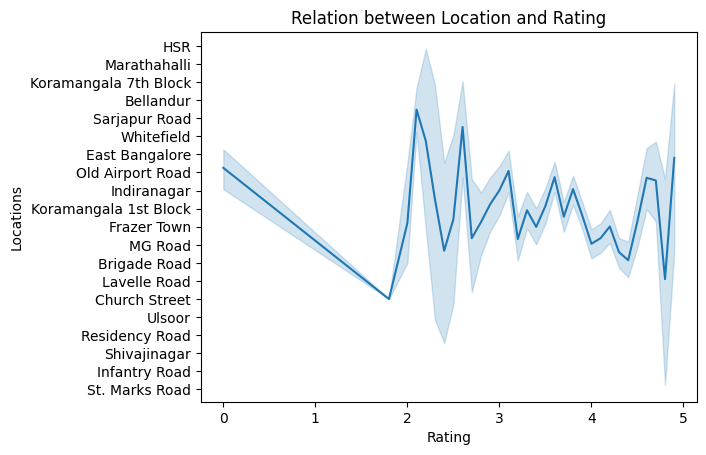

In [42]:
plt.title('Relation between Location and Rating')
sns.lineplot(df,x='Rating',y='Locations')

# Restaurant Type

<Axes: title={'center': 'Restaurant Type'}, ylabel='Rest Type'>

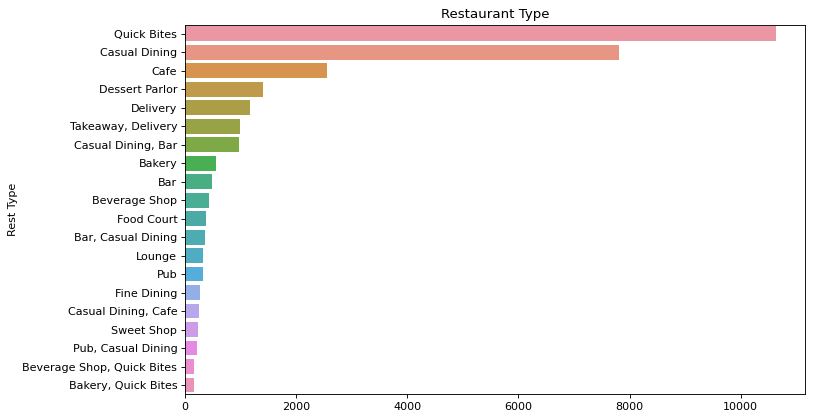

In [43]:
plt.figure(figsize=(10,6),dpi=80)
plt.title('Restaurant Type')
r=df['Rest Type'].value_counts().head(20)
r.to_frame()
sns.barplot(y=r.index,x=r.values)

* Here we plotted barplot for checking Restaurant Type according to rating.
*We concluded that Quick Bites is the maximum type of restaurant.

<Figure size 800x480 with 0 Axes>

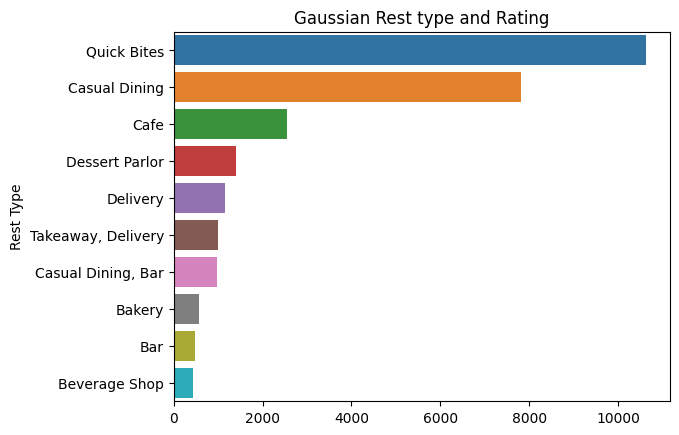

<Figure size 800x480 with 0 Axes>

In [44]:
g=df['Rest Type'].value_counts().head(10)
sns.barplot(y=g.index,x=g.values)
plt.title('Gaussian Rest type and Rating')
plt.figure(figsize=(10,6),dpi=80)

# Types of Services

<Axes: title={'center': 'Types of Service(Rating)'}, xlabel='Rating', ylabel='Type'>

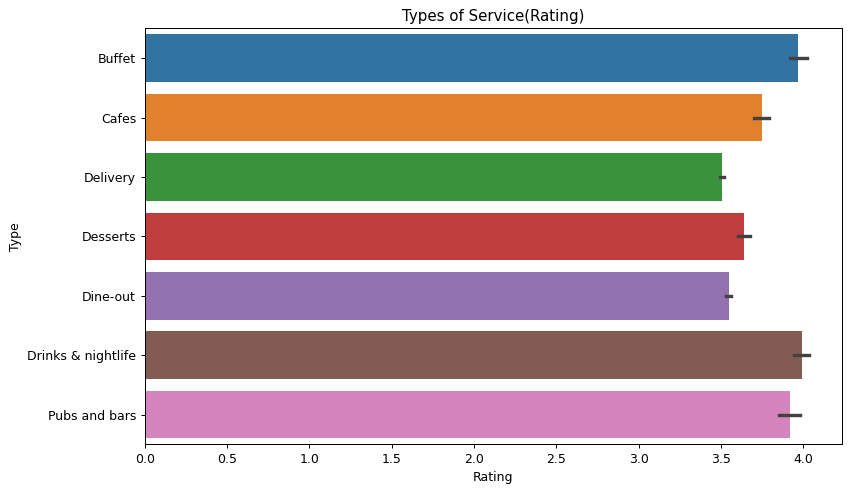

In [45]:
plt.figure(figsize=(10,6),dpi=90)
plt.title('Types of Service(Rating)')
sns.barplot(x='Rating',y='Type',data=df)

* Here we plotted barplot for type of service according to rating.
*We concluded that Drinks & nighlife and Buffet are the best service according to the ratings.

<Axes: title={'center': 'Types of Service(Votes)'}, xlabel='Votes', ylabel='Type'>

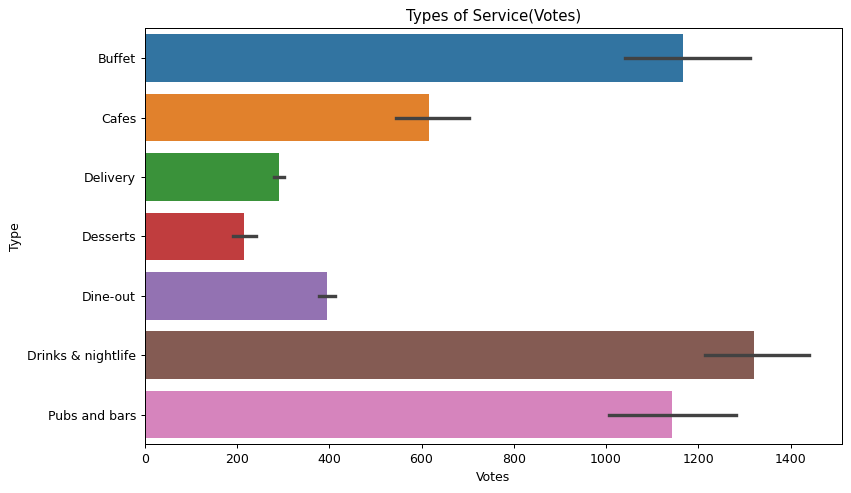

In [46]:
plt.figure(figsize=(10,6),dpi=90)
plt.title('Types of Service(Votes)')
sns.barplot(x='Votes',y='Type',data=df)

* Here we plotted barplot for type of service according to votes.
*We concluded that Drinks & nighlife is the best service according to the votes.

# Relation between Type and Rating

<Figure size 1350x720 with 0 Axes>

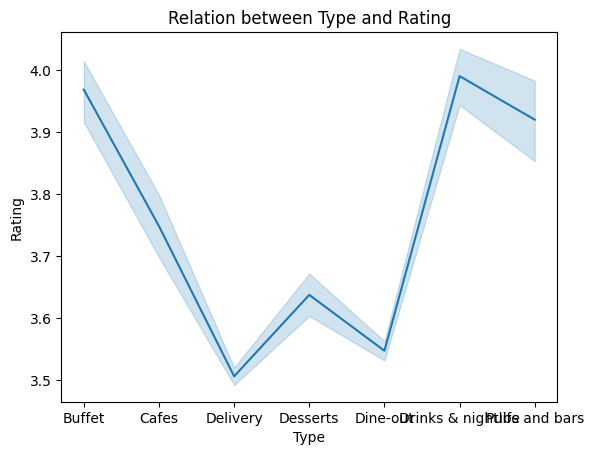

<Figure size 1350x720 with 0 Axes>

In [47]:
sns.lineplot(x='Type',y='Rating',data=df)
plt.title('Relation between Type and Rating')
plt.figure(figsize=(15,8),dpi=90)

* Here we plotted lineplot for showing relation between type and rating.
*We concluded that 'Buffet', 'Cafes', 'Drink & nightlife' and 'Pubs and bars' has highest rating.
*And 'delivery', 'Desserts type', and 'Dine-out' has lowest ratings.

# Cost of Restaurant

<Axes: title={'center': 'Cost of Restaurant'}, xlabel='Approx cost for two people', ylabel='count'>

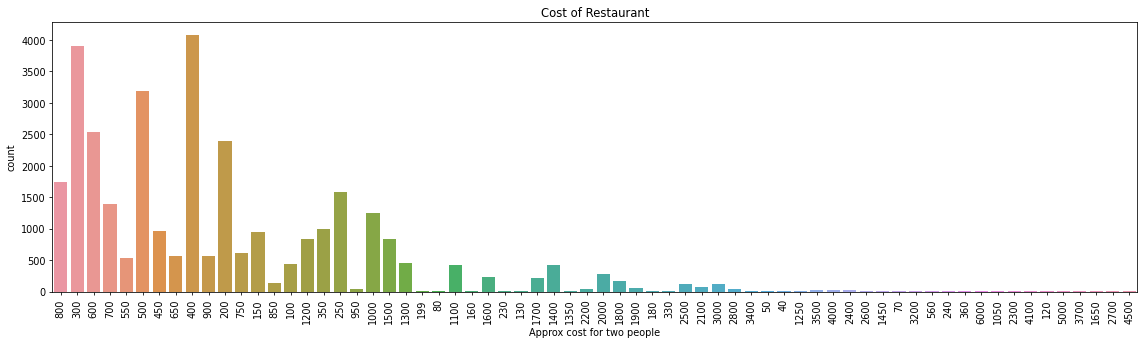

In [48]:
plt.figure(figsize=(20,5),dpi=70)
plt.title('Cost of Restaurant')
plt.xticks(rotation=90)
sns.countplot(x='Approx cost for two people',data=df)


* Here we plotted countplot of Table booking rates.
*We concluded that maximum numbers of restaurant were cost 400.

# No. of restaurants in a Location

Text(0.5, 1.0, 'No. of restaurants in a Location')

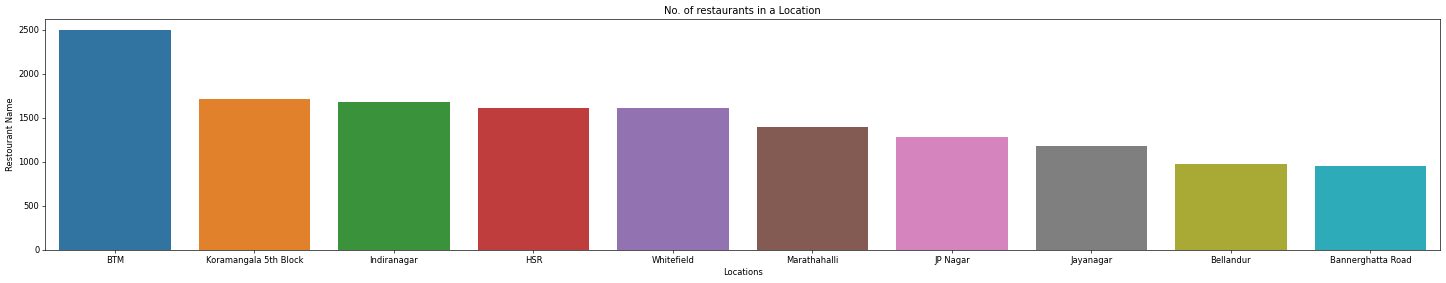

In [49]:
plt.figure(figsize=(30,5),dpi=60)
l=df.groupby('Locations')[['Restourant Name']].count().sort_values(by='Restourant Name',ascending=False).head(10)
l
sns.barplot(x=l.index,y='Restourant Name',data=l)
plt.title('No. of restaurants in a Location')

* Here we plotted barplot for showing number of restaurants in locations.
*We concluded that BTM has maximum numbers of restaurants

# Most famous restaurant chains in Bengaluru

<Axes: title={'center': 'Most famous restaurant(Ratings)'}, xlabel='Restourant Name', ylabel='Rating'>

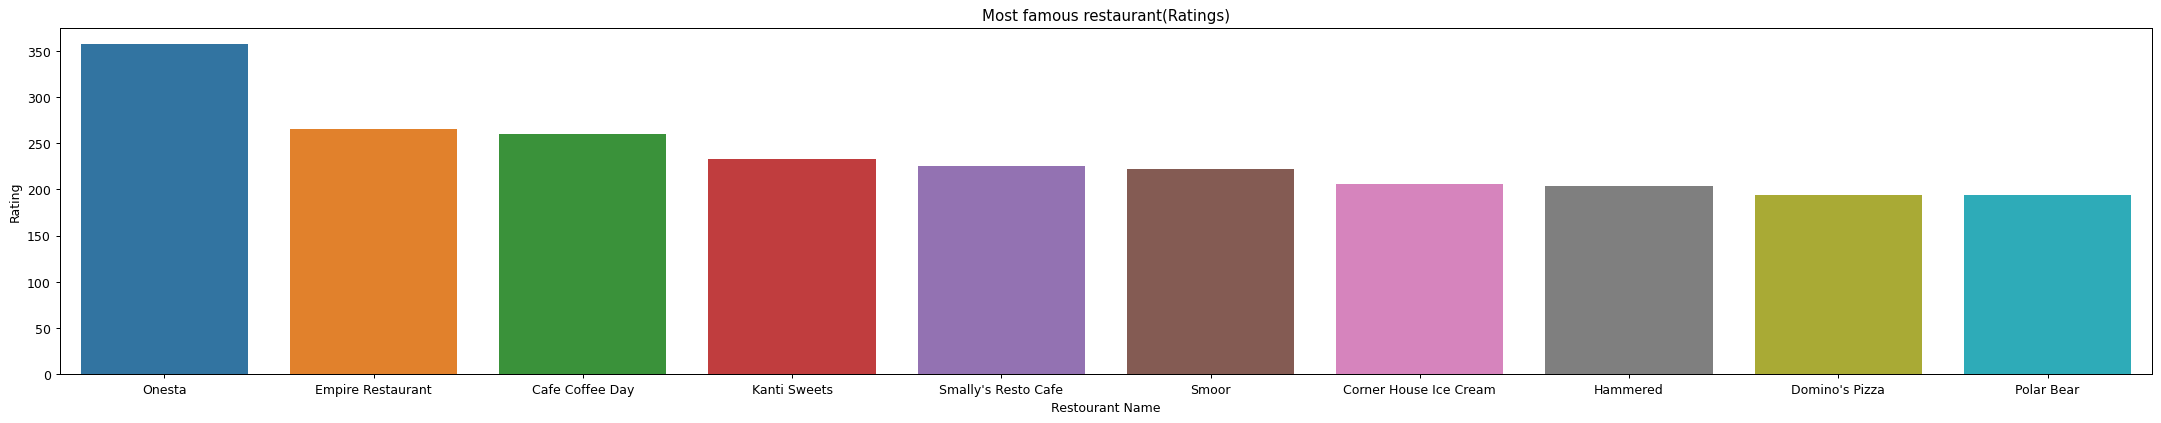

In [50]:
d=df.groupby('Restourant Name')[['Rating']].sum().sort_values('Rating',ascending=False).head(10)
d
plt.figure(figsize=(30,5),dpi=90)
plt.title('Most famous restaurant(Ratings)')
sns.barplot(x=d.index,y='Rating',data=d)

* Here we plotted barplot for showing most famous restaurant according to the rating.
*We concluded that onesta restaurant has highest number of rating.

<Axes: title={'center': 'Most famous restaurant (Votes)'}, xlabel='Restourant Name', ylabel='Votes'>

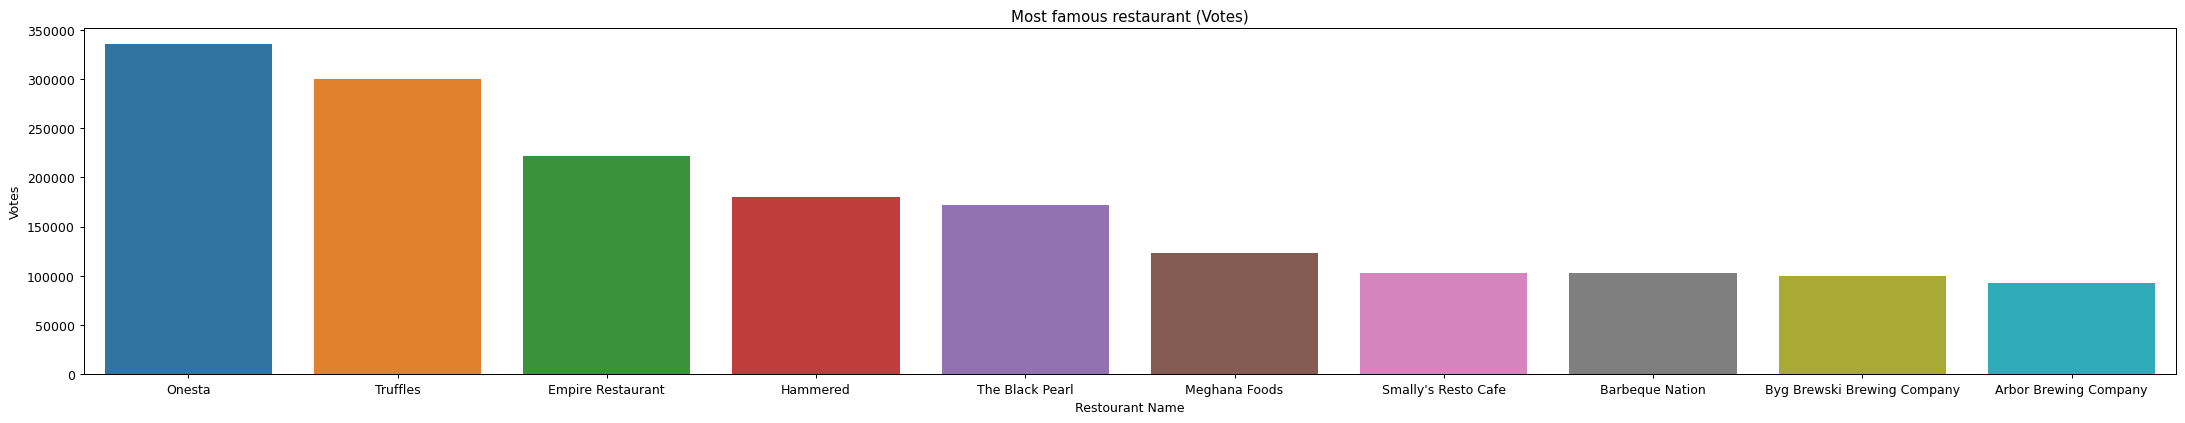

In [51]:
d1=df.groupby('Restourant Name')[['Votes']].sum().sort_values('Votes',ascending=False).head(10)
d1
plt.figure(figsize=(30,5),dpi=90)
plt.title('Most famous restaurant (Votes)')
sns.barplot(x=d1.index,y='Votes',data=d1)

* Here we plotted barplot for showing most famous restaurant according to the votes.
*We concluded that onesta restaurant has highest number of votes.

# Gaussian Rest type and Rating

<Axes: title={'center': 'Gaussian Rest type and Rating'}, xlabel='Rating', ylabel='Density'>

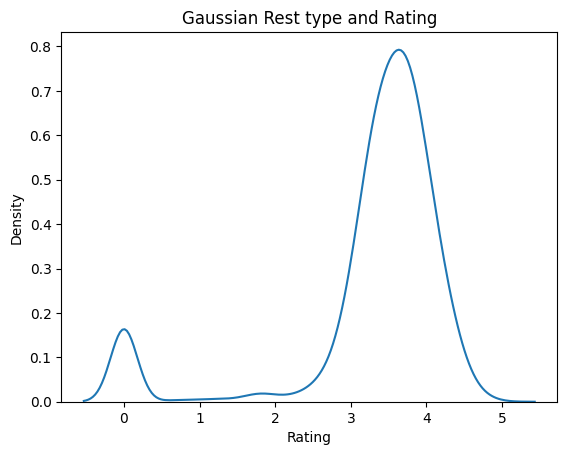

In [52]:
plt.title('Gaussian Rest type and Rating')
g=df.groupby('Restourant Name')['Rating'].mean()
sns.kdeplot(g)

* Here we plotted kdeplot.
*We concluded that the plot is left skewed plot.
*The mean is less than median.

****